In [1]:
import numpy as np
import plate_map as pm
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from unidec_modules import unidectools as ud
from copy import deepcopy 
from unidec_modules.v3_SeqChrom import *
import scipy
from copy import deepcopy
import copy

In [2]:
folders = ["D:\\220121\\PanZ 6M time course repeats"]
map_paths = ["C:/Users/cm19ljc/Documents/GitHub/UniDec/reaction maps/PanZ sortase time course 1.5 eq gvseyg.xlsx"]


In [3]:
def process_maps(self, groupby = 'Reaction'):

    

    # Reaction OR Substrate Conc

    self.pmap2 = self.pmap[self.pmap['Type'] != 'empty']
    self.pmap2.loc[:, 'Species'] = np.nan

    for skey, sval in self.speciesmap.groupby(['Reaction']):
        splist = [Species(spval.to_dict('records')[0], name = spkey) for spkey, spval in sval.groupby('Species')]
        splist = colorcodeclass(splist)

        for s in splist:
            self.pmap2.loc[:, s.__name__] = np.nan
            self.pmap2.loc[self.pmap2['Reaction']==skey, s.__name__] = self.pmap2.apply(lambda _:deepcopy(s), axis = 1)

        spnames = [s.__name__ for s in splist]
        self.pmap2.loc[self.pmap2['Reaction']==skey, 'Species'] = self.pmap2.apply(lambda _:spnames, axis = 1)

    # update_vars

    if len(self.data.spectra) == len(self.pmap2):
        for i, s in enumerate(self.data.spectra):
            well_id = self.pmap2.index[i]
            timevar = self.pmap2['Time'].iloc[i]
            s.attrs['Variable 1'] = well_id
            s.var1 = well_id
            s.attrs['Variable 2'] = timevar
            s.var2 = timevar
            self.pmap2.loc[well_id, 'Spectra'] = s



    spectra = {s.var1:s for s in self.data.spectra}

    # update species with well info/metadata 

    groupby = 'Reaction' # Reaction OR Substrate Conc

    for index, row in self.pmap2.iterrows():
        for specs in row['Species']:
            row[specs] = deepcopy(row[specs])
            row[specs].coord = row.name
    #         print(row[specs])
            vals = row[~row.index.isin(row['Species'])].to_dict()
            row[specs].__dict__.update(vals)
    return self
            

def peak_match(self, window = 10):
    window = 10

    intmat = np.array([])

    for index, row in self.pmap2.iterrows():

        rowints = np.array([])

        specieslist = list(row[row.index.isin(row['Species'])])
        theory_masses = np.array([sp.Mass for sp in specieslist])
        data_masses = np.array([p.mass for p in row['Spectra'].pks.peaks])
        pks = np.array([p for p in row['Spectra'].pks.peaks])

        # match algorithm 
        tm, dm = np.meshgrid(theory_masses, data_masses)
        diff = abs(tm - dm)
        diff[diff>window] = np.nan
        for i, d in enumerate(diff):
            if np.isnan(d).all()==False:
                minimum = np.nanargmin(d)
                data_peak = data_masses[i]

                specieslist[minimum].peak = pks[i]
                specieslist[minimum].integral = pks[i].integral[0]
                print("{}, {} = {}".format(row[row.index.isin(row['Species'])][minimum].__name__, data_peak, pks[i]))

                row[row.index.isin(row['Species'])][minimum].integral = pks[i].integral[0]
                row[row.index.isin(row['Species'])][minimum].peak = pks[i]
                np.append(rowints, pks[i].integral[0])
                print(row[row.index.isin(row['Species'])][minimum].integral)

    return self


In [4]:
def normalise_peaks(self):
    for index, row in self.pmap2.iterrows():
        ints = []
        for s in row[row['Species']]:
            if type(s.integral) != list:
                ints.append(s.integral)

    #     ints = np.array([s.integral for s in row[row['Species']]])
        sum_ints = np.sum(ints)
        for s in row[row['Species']]:
            if type(s.integral) != list:
                s.percentage = s.integral/sum_ints
            else:
                s.percentage = 0
            print("{}:{}".format(s.__name__, s.percentage))
            
    return self



UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML.gz
Error getting TIC in mzML; trying to make it...


C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_modules\mzMLimporter.py:311: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.data = np.array(self.data)


Imported Data. Constructing TIC
Done
loaded D:\220121\PanZ 6M time course repeats\220120 PanZ 6M A r2_341424_RE6_01_82312.d.mzML

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Reading mzML: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML
[Warning] Not index found and build_index_from_scratch is False
Converted to gzip file to improve speed: D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML.gz
Error getting TIC in mzML; trying to make it...
Imported Data. Constructing TIC
Done
loaded D:\220121\PanZ 6M time course repeats\220120 PanZ 6M B r2_341369_RB6_01_82288.d.mzML

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe

UniDec Engine v.5.0.1

UniDec Path: C:\Users\cm19ljc\Documents\GitHub\UniDec\unidec_bin\UniDec.exe
Re

Bad Peak [196.252       0.2697753] 20.198000000000008 [180.792, 200.99]
Bad Peak [196.502        0.25778896] 20.448000000000008 [180.792, 201.24]
Bad Peak [196.751        0.24712628] 20.945999999999998 [180.792, 201.738]
Bad Peak [197.           0.23734555] 21.194999999999993 [180.792, 201.987]
Bad Peak [197.25         0.22816546] 21.444999999999993 [180.792, 202.237]
Bad Peak [197.499        0.21935338] 21.944000000000017 [180.792, 202.73600000000002]
Bad Peak [197.748        0.21082272] 22.193000000000012 [180.792, 202.985]
Bad Peak [197.998        0.20267141] 22.693000000000012 [180.542, 203.235]
Bad Peak [1.98247000e+02 1.95033377e-01] 23.191000000000003 [180.542, 203.733]
Bad Peak [1.98497000e+02 1.87889174e-01] 23.689999999999998 [180.542, 204.232]
Bad Peak [1.98746000e+02 1.81040651e-01] 24.687000000000012 [180.542, 205.229]
Bad Peak [1.98996000e+02 1.74271867e-01] 25.685000000000002 [180.542, 206.227]
Bad Peak [1.99245000e+02 1.67545355e-01] 26.183999999999997 [180.542, 206.726

Getting scans: [810, 855]
Length merge axis: 38804
Getting scans: [1035, 1082]
Length merge axis: 39307
Failed Automatic Peak Width: list indices must be integers or slices, not tuple
[]
Execution Time: 0.06629589999994323
Execution Time: 2.5988424999999893
Execution Time: 0.0941002999999796
Peak info saved to: D:\220121\PanZ 6M time course repeats\UniDec_Figures_and_Files\220125 PanZ labelling 37_341752_BB6_01_82457.d_extracts.txt
D:\220121\PanZ 6M time course repeats\220125 PanZ labelling 37_341752_BB6_01_82457.d.mzML failed
1308 2
Noise Level: 0.05421592980501297 Window: 0.05
Bad Peak [0.419317   0.85315743] 0.23771599999999998 [0.419317, 0.657033]
Bad Peak [0.802517   0.10722651] 0.43308300000000005 [0.419317, 0.8524]
Bad Peak [1.14337 1.     ] 0.34495999999999993 [1.05192, 1.39688]
Bad Peak [1.66703    0.10750679] 0.78552 [1.03115, 1.81667]
2.01622 0.16625999999999985
2.9349 0.16211999999999982
3.89103 0.17041999999999957
Bad Peak [4.93447    0.86151156] 0.23278 [4.83055, 5.06333]

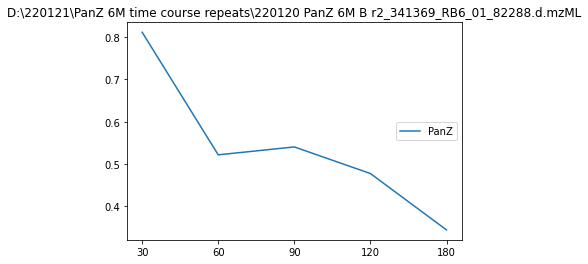

C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


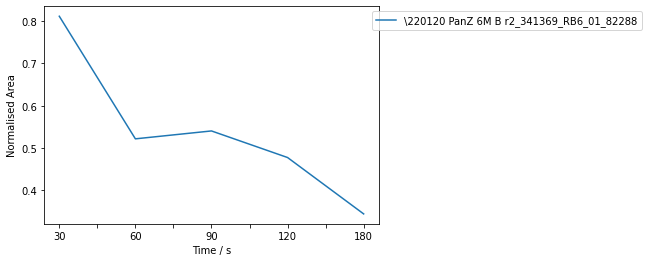

In [5]:
data_df2_list = []

for i, folder in enumerate(folders): 
    filenames = os.listdir(folder)
    engines = []
    for dname, dirs, files in os.walk(folder):

        for fname in files:

            if fname[-4:] == "mzML":
                eng = SeqChrom()

                spectra_path = os.path.join(dname, fname)
                eng.load_mzml(spectra_path)
                print("loaded {}".format(spectra_path))
                engines.append(eng)
                
    plt.figure()
    df1 = pd.DataFrame()
    dflist = []
    for eng in engines:
        try:
            eng.config.chrom_peak_width = 0.05 
            eng.get_chrom_peaks(lb = 1, ub = 5.5) 
            eng.add_chrom_peaks2() 
    #         eng.plot_tic(peak_windows = True)
            eng.update_config(masslb = 10000, massub = 20000, minmz = 500, peakthresh = 0.1)
            eng.process_data()
            eng.run_unidec()
            eng.pick_peaks()
            eng.integrate_all()
    #         eng.plot_all(dtype = 'massdat', combine = True, cmap = 'viridis', xlim = [41000, 43000])
            rmap = eng.upload_map(map_paths[i])
            species, wells = eng.upload_map(map_paths[i])
            eng = process_maps(eng)
            eng = peak_match(eng)
            eng = normalise_peaks(eng)
            self = eng
            # get data

            species = None
            datatype = 'percentage'
            rxndct = {}
            groupby = 'Reaction'

            # def extract_data(self):

            rxns_tc = []
            for k, v in self.pmap2.groupby(groupby):

                time = v['Time']
                speciesdct = {}
                speciestimedct = {}

                for index, row in v.iterrows():
                    if species == None:
                        species = row.Species

                    if len(species) == 1:
                        species = [species]

                    for s in species:
                        if s in speciesdct:
                            speciesdct[s].append(getattr(row[s], datatype))
                            speciestimedct[s].append(row['Time'])

                        else:
                            speciesdct[s] = [getattr(row[s], datatype)]
                            speciestimedct[s] = [row['Time']]
                df = pd.DataFrame(speciesdct, index = time)
                rxns_tc.append(df)

            if len(rxns_tc) == 1:
                rxns_tc = rxns_tc[0]

            for name, y in speciesdct.items():
    #             plt.figure()
                if name == "PanZ":
                    plt.plot(time, y, label = name)
                    plt.legend(loc = "center right")
                    plt.title(eng.path)



            rxndct[k] = pd.DataFrame(speciesdct, index = time)
            rxndct[k].loc[:, 'Path'] = eng.path
            rxndct[k].loc[:, 'Reaction'] = k
            dflist.append(rxndct[k])
            # ---------------------------------------------------------------------------
            self.datadct = rxndct
        except Exception: 
            print("{} failed".format(eng.path))
    plt.show()
    
    
    data_df = pd.concat(dflist)
    
    
    
    key_species = "PanZ"
    l = []
    n = np.array([])
    for name, df in data_df.groupby(['Path', 'Reaction']):

        df[key_species].plot(label = str(name[0][37:-7]))
        plt.legend(loc = 'upper right', bbox_to_anchor=(1.8, 1))
        l.append(np.array(df[key_species]))
    arr = np.array(l)

    yg = arr[:, 2] - arr[:, 0]
    t = data_df.index.unique()
    xg = float(t[2]) -float(t[0])
    g = yg/xg

    # delete negative gradients 
    arr = arr[g>0, :]
    std = np.std(arr, axis = 0)
    mean = np.mean(arr, axis = 0)
    plt.plot(t, mean)
    plt.errorbar(t, mean, std)
    plt.xlabel('Time / s')
    plt.ylabel('Normalised Area')
    plt.show()
    
    data_df.loc[:, 'Cat conc'] = folder
    data_df2_list.append(data_df)

In [6]:
datadf2 = pd.concat(data_df2_list)
datadf2


,PanZ,PanZ-GVSEYG,PanZ-OH,Unknown,Path,Reaction,Cat conc
Time,,,,,,,
30,0.811401,0.188599,0.000000,0.000000,D:\220121\PanZ 6M time course repeats\220120 P...,PanZ,D:\220121\PanZ 6M time course repeats
60,0.521684,0.387629,0.000000,0.090687,D:\220121\PanZ 6M time course repeats\220120 P...,PanZ,D:\220121\PanZ 6M time course repeats
90,0.540344,0.368802,0.000000,0.090853,D:\220121\PanZ 6M time course repeats\220120 P...,PanZ,D:\220121\PanZ 6M time course repeats
120,0.477523,0.425518,0.000000,0.096959,D:\220121\PanZ 6M time course repeats\220120 P...,PanZ,D:\220121\PanZ 6M time course repeats
180,0.344252,0.484266,0.059917,0.111565,D:\220121\PanZ 6M time course repeats\220120 P...,PanZ,D:\220121\PanZ 6M time course repeats


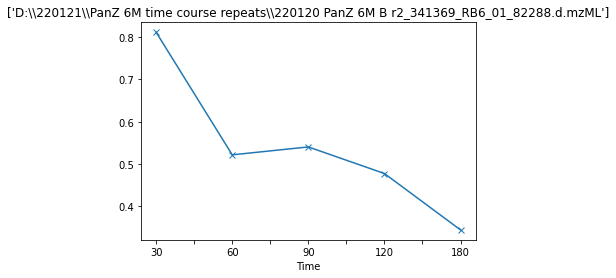

In [7]:
for name, d in datadf2.groupby(['Path']):
    d[key_species].plot(marker = 'x')
    plt.title(d.Path.unique())
    plt.show()

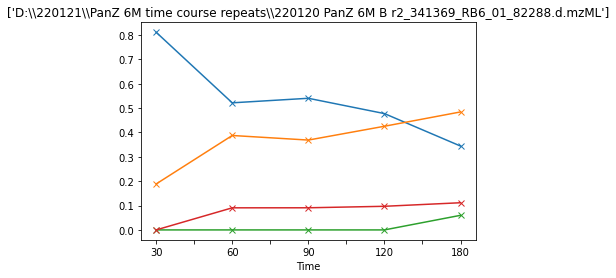

In [8]:
cols = ['Path', 'Reaction', 'Cat conc']
species = list(datadf2[datadf2.columns[~datadf2.columns.isin(cols)]].columns)


for name, d in datadf2.groupby(['Path']):
    plt.figure()
    for key_species in species:
        d[key_species].plot(marker = 'x')
        plt.title(d.Path.unique())
    plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

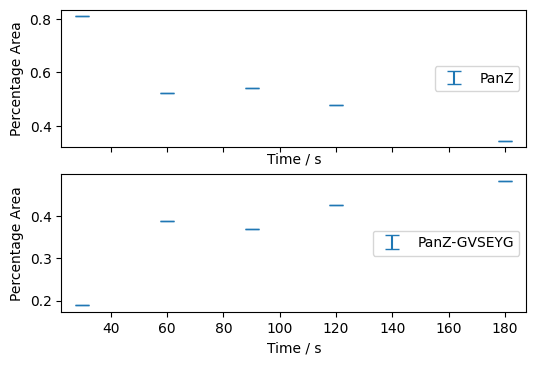

In [9]:
means = datadf2.reset_index().groupby('Time').mean()

fig, ax = plt.subplots(2, 1, sharex = True, dpi = 100)
# for name, d in datadf2.groupby(['Path']):
for i, key_species in enumerate(species):
        

    arr = np.array([np.array(d[key_species]) for name, d in datadf2.reset_index().groupby('Time')])
    means = means.sort_values(by ='Time')
    means.index = means.index.astype(float)
    t = means.index.unique()
    std = np.std(arr, axis = 1)

    
    
    ax[i].errorbar(t, means[key_species], std, label = key_species, capsize = 5, fmt = 'none')
    ax[i].set_xlabel('Time / s')
    ax[i].set_ylabel('Percentage Area')
#     means[key_species].plot(legend = key_species, marker = 'x')
    ax[i].legend(loc = 'center right')
#     ax[i].grid(True)
fig.tight_layout()
plt.show()


In [ ]:
l = np.array([np.array(x[key_species]) for name, x in df.groupby('Time')])

C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


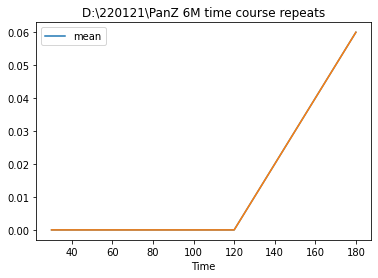

In [12]:
des_df = datadf2.reset_index().groupby(['Cat conc', 'Time']).describe()#.reset_index()
for name, dfs in des_df[key_species].groupby(['Cat conc']):
    
    dfs = dfs.reset_index()
    dfs['Time'] = dfs['Time'].astype(float)
    dfs = dfs.sort_values(by = 'Time').reset_index(drop = True)
    dfs.plot(x = 'Time', y = 'mean')
    plt.errorbar(dfs['Time'], dfs['mean'], dfs['std'])
    plt.title(name)
plt.show()

In [ ]:
# for n, d in datadf2.reset_index().groupby(['Cat conc', 'Time']):
    

In [10]:
thresh = 5
dflist = []
for n, d in datadf2.reset_index().groupby(['Cat conc', 'Time']):
    timepoints = np.array(d[key_species])
    # discount anomolies (speak to supervisors about this/other method)
    l = np.array([y for y in timepoints if y < (timepoints*thresh).all()])
    
    newdf = pd.DataFrame(l, columns = [key_species])
#     newdf = pd.DataFrame([ser])

    newdf['Cat conc'] = n[0]
    newdf['Time'] = n[1]
    
    dflist.append(newdf)
ks_df = pd.concat(dflist)

C:\Users\cm19ljc\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


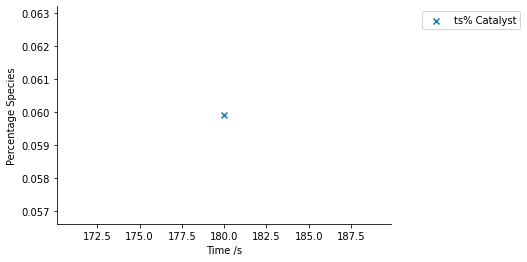

In [11]:
des_df = ks_df.reset_index().groupby(['Cat conc', 'Time']).describe()#.reset_index()

fig, ax = plt.subplots()
for name, dfs in des_df[key_species].groupby(['Cat conc']):
    
    dfs = dfs.reset_index()
    dfs['Time'] = dfs['Time'].astype(float)
    dfs = dfs.sort_values(by = 'Time').reset_index(drop = True)
#     dfs.plot(x = 'Time', y = 'mean')
    ax.errorbar(dfs['Time'], dfs['mean'], dfs['std'], capsize = 5, fmt = 'none')
    l = name[-2:] + "% Catalyst"
    ax.scatter(dfs['Time'], dfs['mean'], label = l, marker = 'x')
    ax.legend(bbox_to_anchor = (1.4, 1), loc = "upper right")
    ax.set_xlabel('Time /s')
    ax.set_ylabel('Percentage Species')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
plt.show()